## 8. Neural networks and deep learning

### 8.1 Fashion classification

In [2]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 60.33 MiB/s, done.
Resolving deltas: 100% (10/10), done.


### 8.2 TensorFlow and Keras

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

import warnings
warnings.filterwarnings("ignore")

2023-11-11 11:39:27.657735: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
path = 'clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

In [3]:
fullname = os.path.join(path, name)
fullname

'clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

In [4]:
img = load_img(fullname, target_size=(299, 299))

In [18]:
x = np.array(img)
x.shape

(299, 299, 3)

In [19]:
x.dtype

dtype('uint8')

### 8.3 Pre-trained convolutional neural networks

- Imagenet dataset: (https://www.image-net.org/)
- Pre-trained models: (https://keras.io/api/applications/)

In [5]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [37]:
model = Xception(weights = 'imagenet',
                 input_shape=(299,299,3))

In [22]:
X = np.array([x])

In [23]:
X.shape

(1, 299, 299, 3)

In [24]:
X = preprocess_input(X)

In [25]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [26]:
pred = model.predict(X)

2023-11-09 14:51:24.829571: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-09 14:51:25.449151: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-09 14:51:25.449990: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-09 14:51:25.450025: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-09 14:51:25.450991: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-09 14:51:25.451069: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [27]:
pred.shape

(1, 1000)

In [28]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

### 8.4 Convolutional Neural Networks

- Types of layer: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231.github.io/

### 8.5 Transfer Learning

- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

**Better to run with a GPU**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [9]:
train_ds = train_gen.flow_from_directory('clothing-dataset-small/train',
                              target_size=(150, 150),
                              batch_size = 32)

Found 3068 images belonging to 10 classes.


In [33]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [34]:
!ls -l clothing-dataset-small/train

total 268
drwxr-sr-x 2 jovyan jovyan 20480 Nov  9 14:44 dress
drwxr-sr-x 2 jovyan jovyan 12288 Nov  9 14:44 hat
drwxr-sr-x 2 jovyan jovyan 36864 Nov  9 14:44 longsleeve
drwxr-sr-x 2 jovyan jovyan 20480 Nov  9 14:44 outwear
drwxr-sr-x 2 jovyan jovyan 36864 Nov  9 14:44 pants
drwxr-sr-x 2 jovyan jovyan 24576 Nov  9 14:44 shirt
drwxr-sr-x 2 jovyan jovyan 20480 Nov  9 14:44 shoes
drwxr-sr-x 2 jovyan jovyan 20480 Nov  9 14:44 shorts
drwxr-sr-x 2 jovyan jovyan 12288 Nov  9 14:44 skirt
drwxr-sr-x 2 jovyan jovyan 69632 Nov  9 14:44 t-shirt


In [11]:
X, y = next(train_ds)

In [12]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [10]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('clothing-dataset-small/validation',
                              target_size=(150, 150),
                              batch_size = 32,
                              shuffle=False)

Found 341 images belonging to 10 classes.


In [14]:
base_model = Xception(weights='imagenet', include_top=False,
                      input_shape = (150, 150, 3))

base_model.trainable = False

In [15]:
base_model = Xception(weights='imagenet', include_top=False,
                      input_shape = (150, 150, 3))

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

# Functional Style
vectors = keras.layers.GlobalAveragePooling2D()(base)

# 10 for 10 classes
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [40]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [41]:
preds.shape

(32, 10)

In [42]:
preds[0]

array([-1.1066554 , -0.5052897 ,  1.0721812 ,  0.18119696, -0.08714497,
       -0.05672097,  0.909745  ,  0.02818141, -0.36961028, -0.6817609 ],
      dtype=float32)

In [43]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits = True)

model.compile(optimizer = optimizer,
              loss = loss,
              metrics =['accuracy'])

In [44]:
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
96/96 [==============================] - 15s 138ms/step - loss: 1.2732 - accuracy: 0.6656 - val_loss: 1.1017 - val_accuracy: 0.7331
Epoch 2/10
96/96 [==============================] - 11s 112ms/step - loss: 0.5816 - accuracy: 0.8158 - val_loss: 0.9490 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 11s 114ms/step - loss: 0.3767 - accuracy: 0.8758 - val_loss: 0.8933 - val_accuracy: 0.7859
Epoch 4/10
96/96 [==============================] - 11s 115ms/step - loss: 0.2285 - accuracy: 0.9221 - val_loss: 0.8316 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 11s 113ms/step - loss: 0.1525 - accuracy: 0.9459 - val_loss: 0.9494 - val_accuracy: 0.7830
Epoch 6/10
96/96 [==============================] - 11s 114ms/step - loss: 0.0976 - accuracy: 0.9684 - val_loss: 1.0230 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 11s 113ms/step - loss: 0.0657 - accuracy: 0.9804 - val_loss: 0.9627 - val_accuracy: 0.7889

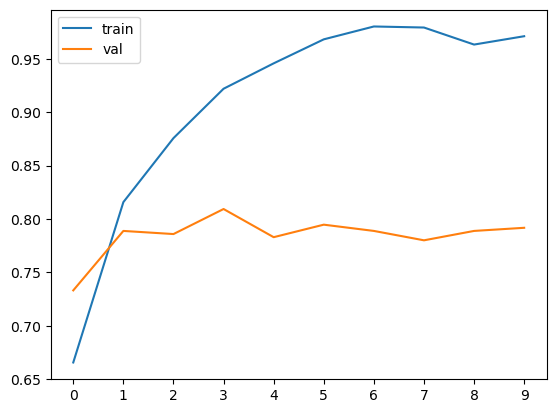

In [53]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()
plt.show()

### 8.6 Adjusting the learning rate

- What's the learning rate
- Trying different values

In [14]:
def make_model(learning_rate=0.01):
    
    base_model = Xception(weights='imagenet', include_top=False,
                      input_shape = (150, 150, 3))

    base_model.trainable = False
    
    ###########################################
    # Architecture
    ###########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)

    # Functional Style
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    # 10 for 10 classes
    outputs = keras.layers.Dense(10)(vectors)

    model = keras.Model(inputs, outputs)
    
    ###########################################
    
    optimizer = keras.optimizers.Adam(
        learning_rate = learning_rate
    )

    loss = keras.losses.CategoricalCrossentropy(
        from_logits = True
    )

    model.compile(
        optimizer = optimizer, 
        loss = loss, 
        metrics =['accuracy'])
    
    return model

In [55]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f'Learning rate = {lr}')
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()
    

Learning rate = 0.0001
Epoch 1/10
96/96 [==============================] - 14s 124ms/step - loss: 1.8196 - accuracy: 0.4153 - val_loss: 1.5375 - val_accuracy: 0.4956
Epoch 2/10
96/96 [==============================] - 12s 119ms/step - loss: 1.3483 - accuracy: 0.5795 - val_loss: 1.2326 - val_accuracy: 0.6276
Epoch 3/10
96/96 [==============================] - 11s 114ms/step - loss: 1.1229 - accuracy: 0.6548 - val_loss: 1.0597 - val_accuracy: 0.6686
Epoch 4/10
96/96 [==============================] - 11s 113ms/step - loss: 0.9902 - accuracy: 0.6855 - val_loss: 0.9551 - val_accuracy: 0.6979
Epoch 5/10
96/96 [==============================] - 11s 113ms/step - loss: 0.8999 - accuracy: 0.7200 - val_loss: 0.8819 - val_accuracy: 0.7243
Epoch 6/10
96/96 [==============================] - 11s 111ms/step - loss: 0.8329 - accuracy: 0.7379 - val_loss: 0.8329 - val_accuracy: 0.7273
Epoch 7/10
96/96 [==============================] - 11s 112ms/step - loss: 0.7817 - accuracy: 0.7575 - val_loss: 0.7971

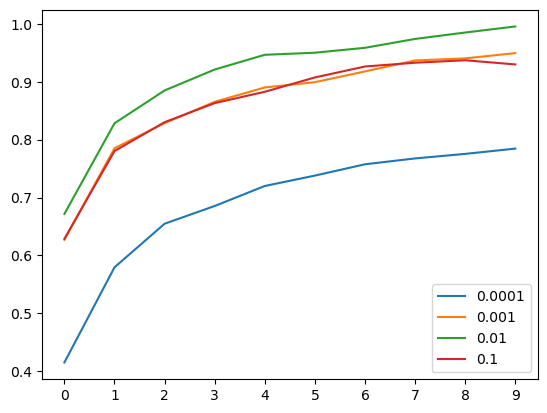

In [57]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()
plt.show()

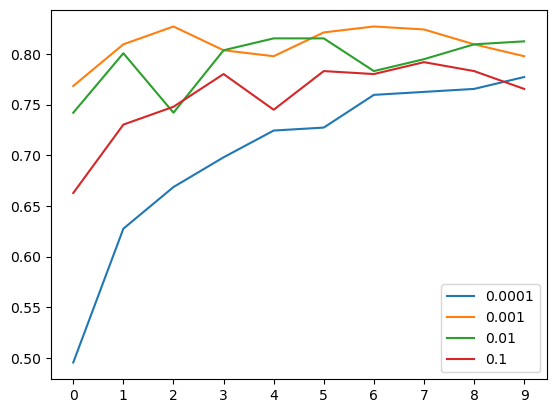

In [58]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [59]:
del scores[0.1]
del scores[0.0001]

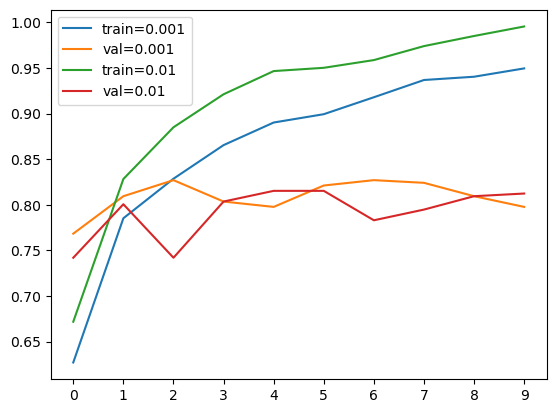

In [62]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=f'train={lr}')
    plt.plot(hist['val_accuracy'], label=f'val={lr}')

plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [61]:
learning_rate = 0.001

### 8.7 Checkpointing

- Saving the best model only
- Training a model with callbacks

In [64]:
model.save_weights('model_v1.h5', save_format='h5')

In [65]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=12, val_accuracy=0.84)

'xception_v1_12_0.840.h5'

In [66]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max' 
)

In [67]:
model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 14s 121ms/step - loss: 1.0553 - accuracy: 0.6437 - val_loss: 0.6851 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 11s 110ms/step - loss: 0.6239 - accuracy: 0.7907 - val_loss: 0.6092 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 11s 111ms/step - loss: 0.4993 - accuracy: 0.8299 - val_loss: 0.5660 - val_accuracy: 0.8123
Epoch 4/10
96/96 [==============================] - 11s 110ms/step - loss: 0.4240 - accuracy: 0.8673 - val_loss: 0.5614 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 11s 110ms/step - loss: 0.3653 - accuracy: 0.8895 - val_loss: 0.5299 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 11s 113ms/step - loss: 0.3227 - accuracy: 0.9048 - val_loss: 0.5224 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 11s 113ms/step - loss: 0.2847 - accuracy: 0.9257 - val_loss: 0.5226 - val_accuracy: 0.8299

### 8.8 Adding More Layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer 

In [7]:
def make_model(learning_rate=0.01, size_inner = 100):
    
    base_model = Xception(
        weights='imagenet', 
        include_top=False, 
        input_shape = (150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################
    # Architecture
    ###########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)

    # Functional Style
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # Adding an inner layer of neurons
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    # 10 for 10 classes
    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)
    
    ###########################################
    
    optimizer = keras.optimizers.Adam(
        learning_rate = learning_rate
    )

    loss = keras.losses.CategoricalCrossentropy(
        from_logits = True
    )

    model.compile(
        optimizer = optimizer, 
        loss = loss, 
        metrics =['accuracy'])
    
    return model

In [23]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max' 
)

In [24]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(f'Inner Layer Size = {size}')
    
    model = make_model(learning_rate=learning_rate, 
                       size_inner=size)
    history = model.fit(train_ds, 
                        epochs=10, 
                        validation_data=val_ds, 
                        callbacks=[checkpoint])
    scores[size] = history.history
    
    print()

Inner Layer Size = 10
Epoch 1/10
96/96 [==============================] - 14s 129ms/step - loss: 1.4188 - accuracy: 0.5271 - val_loss: 1.0196 - val_accuracy: 0.6804
Epoch 2/10
96/96 [==============================] - 12s 121ms/step - loss: 0.8807 - accuracy: 0.7174 - val_loss: 0.7730 - val_accuracy: 0.7361
Epoch 3/10
96/96 [==============================] - 11s 119ms/step - loss: 0.6582 - accuracy: 0.7819 - val_loss: 0.6696 - val_accuracy: 0.7771
Epoch 4/10
96/96 [==============================] - 12s 124ms/step - loss: 0.5392 - accuracy: 0.8224 - val_loss: 0.6173 - val_accuracy: 0.7801
Epoch 5/10
96/96 [==============================] - 12s 121ms/step - loss: 0.4525 - accuracy: 0.8579 - val_loss: 0.6078 - val_accuracy: 0.7889
Epoch 6/10
96/96 [==============================] - 12s 120ms/step - loss: 0.3928 - accuracy: 0.8797 - val_loss: 0.5856 - val_accuracy: 0.8006
Epoch 7/10
96/96 [==============================] - 11s 118ms/step - loss: 0.3412 - accuracy: 0.9022 - val_loss: 0.5740 

In [26]:
scores

{10: {'loss': [1.4188036918640137,
   0.8806565403938293,
   0.6582047939300537,
   0.5392430424690247,
   0.4524664580821991,
   0.39284053444862366,
   0.34124866127967834,
   0.30012238025665283,
   0.25831833481788635,
   0.23274867236614227],
  'accuracy': [0.5270534753799438,
   0.7174054980278015,
   0.78194260597229,
   0.8223598599433899,
   0.857887864112854,
   0.879726231098175,
   0.9022164344787598,
   0.9152542352676392,
   0.9312255382537842,
   0.9393742084503174],
  'val_loss': [1.0196396112442017,
   0.7730241417884827,
   0.669551432132721,
   0.6172866225242615,
   0.6077722907066345,
   0.5856019258499146,
   0.5739726424217224,
   0.5602547526359558,
   0.5589429140090942,
   0.5736432075500488],
  'val_accuracy': [0.6803519129753113,
   0.7360703945159912,
   0.7771260738372803,
   0.7800586223602295,
   0.7888563275337219,
   0.8005865216255188,
   0.8005865216255188,
   0.8123167157173157,
   0.8211143612861633,
   0.8093841671943665]},
 100: {'loss': [0.97144

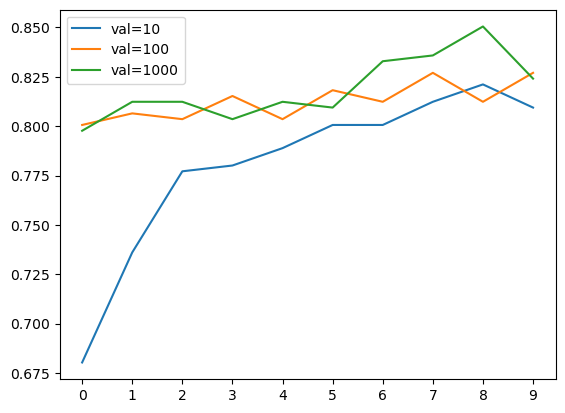

In [27]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(f'val={size}'))

plt.xticks(np.arange(10))    
plt.legend()

### 8.9 Regularization and dropout

- Regularization by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [16]:
def make_model(learning_rate=0.01, size_inner = 100, droprate=0.5):
    
    base_model = Xception(
        weights='imagenet', 
        include_top=False, 
        input_shape = (150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################
    # Architecture
    ###########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)

    # Functional Style
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    # Adding an inner layer of neurons
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    # 10 for 10 classes
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)
    
    ###########################################
    
    optimizer = keras.optimizers.Adam(
        learning_rate = learning_rate
    )

    loss = keras.losses.CategoricalCrossentropy(
        from_logits = True
    )

    model.compile(
        optimizer = optimizer, 
        loss = loss, 
        metrics =['accuracy'])
    
    return model

In [44]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max' 
)

In [45]:
learning_rate = 0.001
size = 1000

scores = {}

for rate in [0.0, 0.2, 0.5, 0.8]:
    print(f'Droprate = {rate}')
    
    model = make_model(learning_rate=learning_rate, 
                       size_inner=size, 
                       droprate=rate)
    history = model.fit(train_ds, 
                        epochs=30, 
                        validation_data=val_ds, 
                        callbacks=[checkpoint])
    scores[rate] = history.history
    
    print()

Droprate = 0.0
Epoch 1/30
96/96 [==============================] - 15s 134ms/step - loss: 0.9325 - accuracy: 0.6809 - val_loss: 0.6589 - val_accuracy: 0.7771
Epoch 2/30
96/96 [==============================] - 12s 125ms/step - loss: 0.4255 - accuracy: 0.8481 - val_loss: 0.6055 - val_accuracy: 0.7918
Epoch 3/30
96/96 [==============================] - 12s 125ms/step - loss: 0.2737 - accuracy: 0.9097 - val_loss: 0.5711 - val_accuracy: 0.8211
Epoch 4/30
96/96 [==============================] - 12s 122ms/step - loss: 0.1486 - accuracy: 0.9550 - val_loss: 0.6560 - val_accuracy: 0.8065
Epoch 5/30
96/96 [==============================] - 12s 121ms/step - loss: 0.0977 - accuracy: 0.9707 - val_loss: 0.6301 - val_accuracy: 0.8211
Epoch 6/30
96/96 [==============================] - 12s 121ms/step - loss: 0.0692 - accuracy: 0.9821 - val_loss: 0.7960 - val_accuracy: 0.7918
Epoch 7/30
96/96 [==============================] - 12s 122ms/step - loss: 0.0273 - accuracy: 0.9974 - val_loss: 0.6372 - val_a

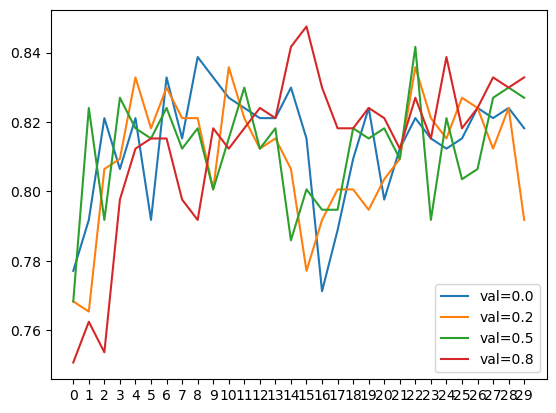

In [47]:
for rate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(f'val={rate}'))

plt.xticks(np.arange(30))    
plt.legend()

In [48]:
scores[0.8]

{'loss': [1.4395147562026978,
  0.9347097277641296,
  0.8095467686653137,
  0.7254647612571716,
  0.7003442645072937,
  0.6704656481742859,
  0.6040536761283875,
  0.5572145581245422,
  0.541305422782898,
  0.5167664289474487,
  0.4575043022632599,
  0.45519956946372986,
  0.4270159602165222,
  0.4186382293701172,
  0.4128339886665344,
  0.40674978494644165,
  0.3671231269836426,
  0.36402344703674316,
  0.3462168574333191,
  0.32324591279029846,
  0.3480031490325928,
  0.31848037242889404,
  0.32054394483566284,
  0.3209054172039032,
  0.2848007082939148,
  0.28486648201942444,
  0.2656085193157196,
  0.24607877433300018,
  0.24257224798202515,
  0.2623799741268158],
 'accuracy': [0.5560625791549683,
  0.6818774342536926,
  0.7229465246200562,
  0.74250328540802,
  0.7666231989860535,
  0.7685788869857788,
  0.775749683380127,
  0.8102998733520508,
  0.8083441853523254,
  0.8158409595489502,
  0.833441972732544,
  0.8350716829299927,
  0.8474576473236084,
  0.8533246517181396,
  0.854

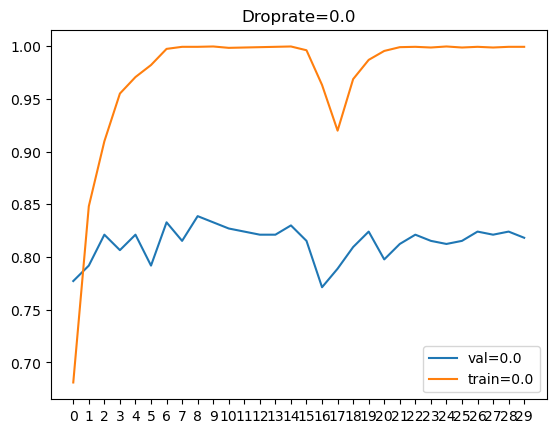

In [51]:
score = scores[0.0]
plt.plot(score['val_accuracy'], label='val=0.0')
plt.plot(score['accuracy'], label='train=0.0')

plt.xticks(np.arange(30))
plt.legend()
plt.title('Droprate=0.0')
plt.show()

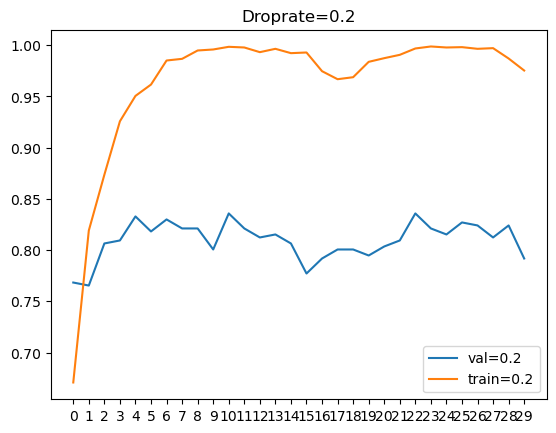

In [52]:
score = scores[0.2]
plt.plot(score['val_accuracy'], label='val=0.2')
plt.plot(score['accuracy'], label='train=0.2')

plt.xticks(np.arange(30))
plt.legend()
plt.title('Droprate=0.2')
plt.show()

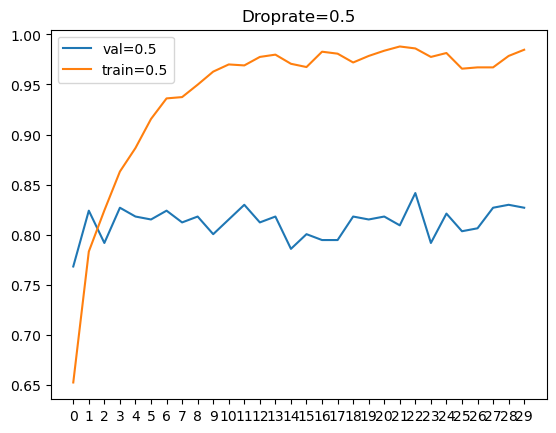

In [53]:
score = scores[0.5]
plt.plot(score['val_accuracy'], label='val=0.5')
plt.plot(score['accuracy'], label='train=0.5')

plt.xticks(np.arange(30))
plt.legend()
plt.title('Droprate=0.5')
plt.show()

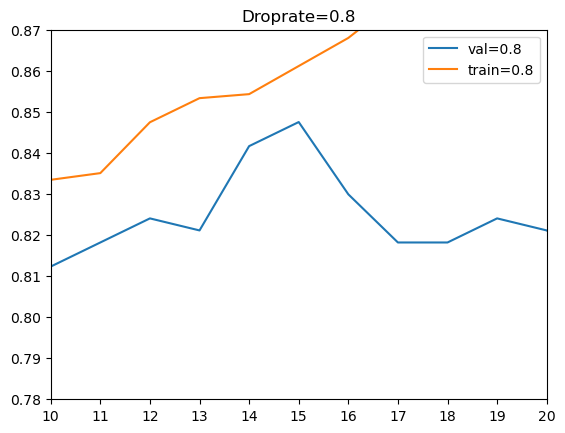

In [57]:
score = scores[0.8]
plt.plot(score['val_accuracy'], label='val=0.8')
plt.plot(score['accuracy'], label='train=0.8')

plt.xticks(np.arange(30))
plt.legend()
plt.title('Droprate=0.8')
plt.ylim(0.78, 0.87)
plt.xlim(10, 20)
plt.show()

### 8.10 Data Augmentation

- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?

In [11]:
# train_gen = ImageDataGenerator(
#     preprocessing_function=preprocess_input, 
#     rotation_range=30, 
#     width_shift_range=10.0, 
#     height_shift_range=10.0,
#     shear_range=10.0,
#     zoom_range=0.1,
#     cval=0.0,
#     vertical_flip=True,
# )

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory('clothing-dataset-small/train',
                              target_size=(150, 150),
                              batch_size = 32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size = 32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [12]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max' 
)

In [17]:
learning_rate = 0.001
size = 1000
droprate = 0.8

model = make_model(learning_rate=learning_rate, 
                   size_inner=size, 
                   droprate=droprate)

history = model.fit(train_ds, 
                    epochs=50, 
                    validation_data=val_ds, 
                    callbacks=[checkpoint])

2023-11-11 12:05:07.644670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 12:05:07.651431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 12:05:07.652045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 12:05:07.653049: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Epoch 1/50


2023-11-11 12:05:13.742338: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-11 12:05:14.388803: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-11 12:05:14.389642: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-11 12:05:14.389684: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-11 12:05:14.390626: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-11 12:05:14.390720: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


96/96 [==============================] - 33s 292ms/step - loss: 1.7274 - accuracy: 0.4743 - val_loss: 0.8125 - val_accuracy: 0.7478
Epoch 2/50
96/96 [==============================] - 24s 250ms/step - loss: 1.2134 - accuracy: 0.5900 - val_loss: 0.7621 - val_accuracy: 0.7449
Epoch 3/50
96/96 [==============================] - 24s 250ms/step - loss: 1.1075 - accuracy: 0.6209 - val_loss: 0.7297 - val_accuracy: 0.7478
Epoch 4/50
96/96 [==============================] - 24s 253ms/step - loss: 1.0313 - accuracy: 0.6600 - val_loss: 0.7185 - val_accuracy: 0.7449
Epoch 5/50
96/96 [==============================] - 24s 252ms/step - loss: 0.9871 - accuracy: 0.6581 - val_loss: 0.6516 - val_accuracy: 0.7918
Epoch 6/50
96/96 [==============================] - 24s 250ms/step - loss: 0.9563 - accuracy: 0.6731 - val_loss: 0.6173 - val_accuracy: 0.7889
Epoch 7/50
96/96 [==============================] - 24s 251ms/step - loss: 0.9437 - accuracy: 0.6829 - val_loss: 0.6220 - val_accuracy: 0.7889
Epoch 8/50

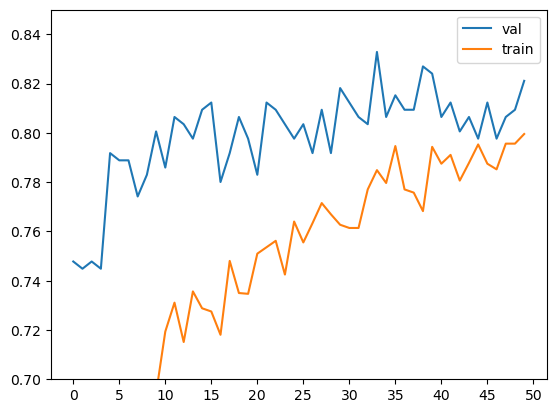

In [22]:
plt.plot(history.history['val_accuracy'], label='val')
plt.plot(history.history['accuracy'], label='train')

plt.legend()
plt.xticks(np.arange(0, 51, 5))
plt.ylim(0.70, 0.85)
plt.show()

### 8.11 Train a larger model
- Train a 299x299 model

In [26]:
def make_model(input_size=150, learning_rate=0.01, size_inner = 100, droprate=0.5):
    
    base_model = Xception(
        weights='imagenet', 
        include_top=False, 
        input_shape = (input_size, input_size, 3)
    )

    base_model.trainable = False
    
    ###########################################
    # Architecture
    ###########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)

    # Functional Style
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    # Adding an inner layer of neurons
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    # 10 for 10 classes
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)
    
    ###########################################
    
    optimizer = keras.optimizers.Adam(
        learning_rate = learning_rate
    )

    loss = keras.losses.CategoricalCrossentropy(
        from_logits = True
    )

    model.compile(
        optimizer = optimizer, 
        loss = loss, 
        metrics =['accuracy'])
    
    return model

In [38]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True
)

# train_gen = ImageDataGenerator(
#     preprocessing_function=preprocess_input, 
# )

train_ds = train_gen.flow_from_directory('clothing-dataset-small/train',
                              target_size=(input_size, input_size),
                              batch_size = 32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size = 32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [39]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v5_2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max' 
)

In [40]:
learning_rate = 0.0005
size = 100
droprate = 0.2
input_size = 299

model = make_model(input_size=input_size,
                   learning_rate=learning_rate, 
                   size_inner=size, 
                   droprate=droprate)

history = model.fit(train_ds, 
                    epochs=20, 
                    validation_data=val_ds, 
                    callbacks=[checkpoint])

Epoch 1/20
96/96 [==============================] - 69s 684ms/step - loss: 0.9798 - accuracy: 0.6972 - val_loss: 0.5342 - val_accuracy: 0.8416
Epoch 2/20
96/96 [==============================] - 64s 664ms/step - loss: 0.5350 - accuracy: 0.8168 - val_loss: 0.4599 - val_accuracy: 0.8622
Epoch 3/20
96/96 [==============================] - 63s 654ms/step - loss: 0.4281 - accuracy: 0.8563 - val_loss: 0.4035 - val_accuracy: 0.8651
Epoch 4/20
 7/96 [=>............................] - ETA: 57s - loss: 0.3513 - accuracy: 0.8705

KeyboardInterrupt: 

### 8.12 Using the Model

- Loading the model
- Evaluating the model
- Getting predictions

__Note__: Before running this step, make sure to restart the notebook

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [2]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    'clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size = 32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [3]:
model = keras.models.load_model('xception_v5_2_03_0.865.h5')

2023-11-11 12:52:09.443771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 12:52:09.451024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 12:52:09.451866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 12:52:09.452769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [4]:
model.evaluate(test_ds)

2023-11-11 12:52:31.374517: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-11 12:52:32.014713: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-11 12:52:32.015657: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-11 12:52:32.015700: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-11 12:52:32.016602: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-11 12:52:32.016703: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


12/12 [==============================] - 7s 269ms/step - loss: 0.2999 - accuracy: 0.9167


[0.29987940192222595, 0.9166666865348816]

In [5]:
path = 'clothing-dataset-small/test/pants/122f0c94-4f37-4010-8c43-06d79bdf4433.jpg'

In [7]:
img = load_img(path, target_size=(299,299))

In [10]:
x = np.array(img)

In [11]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [12]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

1/1 [==============================] - 0s 22ms/step


In [15]:
pred[0]

array([-1.350722  , -2.1797433 , -0.9043392 , -1.0627258 ,  5.086698  ,
       -0.4258917 , -1.0106696 ,  2.6338933 , -0.13267542, -1.5940399 ],
      dtype=float32)

In [16]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [17]:
dict(zip(classes, pred[0]))

{'dress': -1.350722,
 'hat': -2.1797433,
 'longsleeve': -0.9043392,
 'outwear': -1.0627258,
 'pants': 5.086698,
 'shirt': -0.4258917,
 'shoes': -1.0106696,
 'shorts': 2.6338933,
 'skirt': -0.13267542,
 't-shirt': -1.5940399}

### 8.13 Summary

- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model (150x150) before training a big one (299x299)
- Learning rate - how fast the model trains. Fast learners aren't always best ones
- We can save the best model using callbacks and checkpointing
- To avoid overfitting, use dropout and augmentation

### 8.14 Explore More

- Add more data, e.g. Zolando, etc (ADD LINKS)
- Albumentations - another way of generating augmentations
- Use PyTorch or MXNet instead of Tensorflow/Keras
- In addition to Xception, there are other architectures - try them

Other projects:

- cats vs dogs
- Hotdog v not hotdog
- Category of images